# Classification Homework

## Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# To display plots properly in cells
%matplotlib inline

In [44]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Data Preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 

In [46]:
# Fill null values with 0
df.fillna(0, inplace=True)

In [47]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

In [48]:
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

<1H OCEAN is the most frequent ocean_proximity value

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

In [49]:
corr_matrix = df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


<AxesSubplot:>

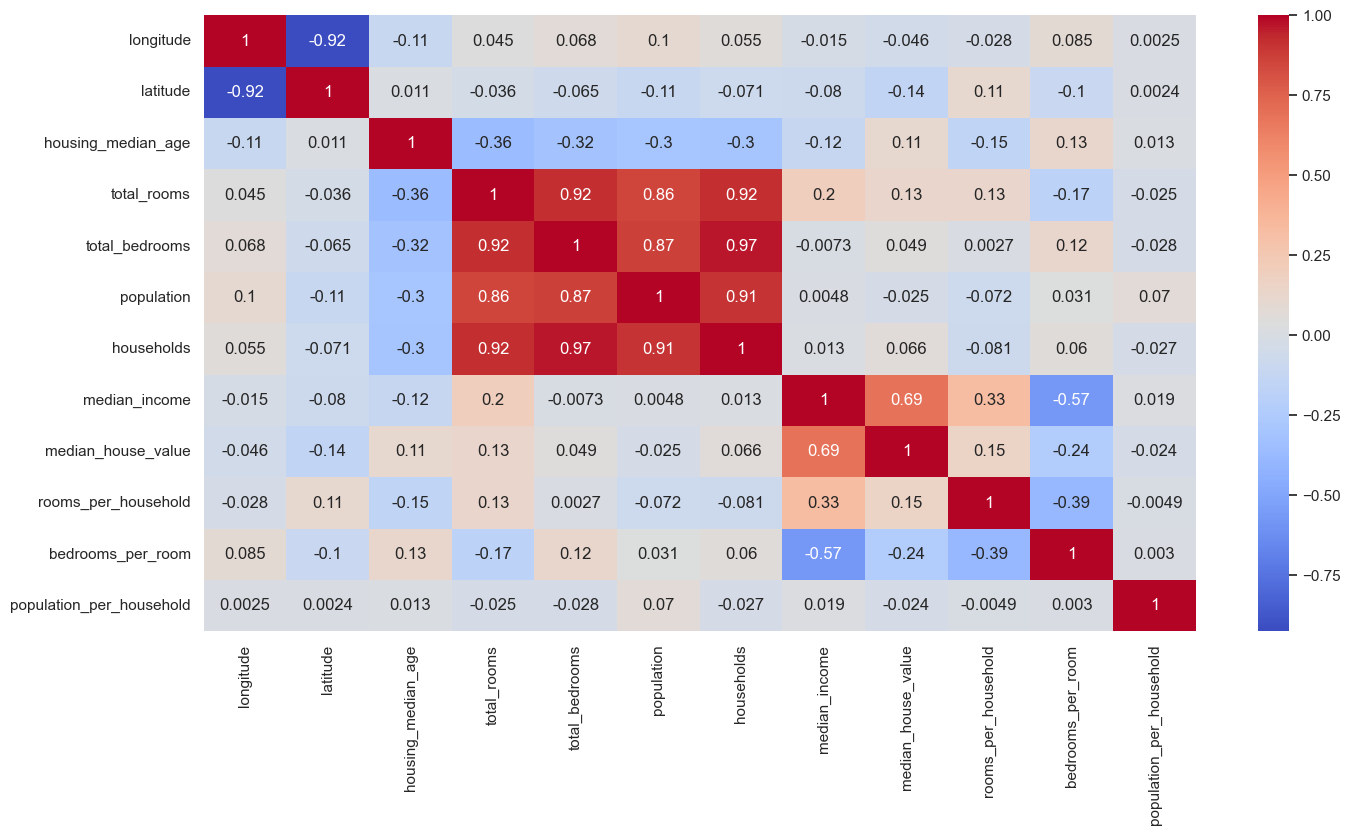

In [50]:
# Plotting a heat map of the correlation matrix. 
# Reference: https://androidkt.com/find-correlation-between-features-and-target-using-the-correlation-matrix/

sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(corr_matrix, annot = True, fmt='.2g',cmap= 'coolwarm')

From the heatmap of the correlation matrix, we can easily see that `total_bedrooms` and `households` have the maximum correlation

## Make `median_house_value` binary

In [51]:
# Converting the target column (median_house_value) to binary
df['above_average'] = (df['median_house_value'] > df['median_house_value'].mean()).astype('int')
df[['median_house_value', 'above_average']]

,median_house_value,above_average
0,452600.0,1
1,358500.0,1
2,352100.0,1
3,341300.0,1
4,342200.0,1
...,...,...
20635,78100.0,0
20636,77100.0,0
20637,92300.0,0
20638,84700.0,0


## Split the data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Splitting the data using scikit-learn
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train.shape, df_val.shape, df_test.shape

((12384, 14), (4128, 14), (4128, 14))

In [54]:
# Separating the target variable
y_full_train = df_full_train.above_average.values
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

# Deleting the above_average and median_house_value columns from the splits (except df_full_train)
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3

* Calculate the *mutual information score* between `above_average` and `ocean_proximity` . Use the training set only.
* Round it to 2 decimals using `round(score, 2)`
* What is their *mutual information score*?


Options:
- 0.26
- 0
- 0.10
- 0.16

In [55]:
from sklearn.metrics import mutual_info_score

In [56]:
round(mutual_info_score(df_train.ocean_proximity, y_train),2)

0.1

## Modelling

### Question 4

* Now let's train a logistic regression model
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95

One-hot encoding the `ocean_proximity` feature

In [57]:
from sklearn.feature_extraction import DictVectorizer

In [58]:
# Function that returns the one-hot encoded train and validation dataframes
def one_hot_encode_dfs(df_train, df_val):
    dv = DictVectorizer(sparse=False)

    train_dict = df_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    return X_train, X_val


Training the model

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
X_train, X_val = one_hot_encode_dfs(df_train, df_val)
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

Making predictions on the validation set

In [61]:
y_pred = model.predict(X_val)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [62]:
original_accuracy = (y_pred == y_val).mean() 
round(original_accuracy,2)

0.84

We see that the model is 84% accurate

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive

Creating a function `feature elimination` that works as follows:

- Create a copy of the train and validation dfs
- Calculate no. of iterations `num_iters` (iterations = no. of features + 1)
- Run a loop till `num_iters` 
- For iteration 2 till the end, pop the first element of the features list and store it
- Modify the train and val sets to only include those features and one hot encode the sets
- Train the model and validate it. Store the accuracy and difference between original accuracy and accuracy (iterations 2 till end) in a dict 
- Put the popped feature at the end of the features list (for iteration 2 till end) 

In [23]:
def feature_elimination(df_train, df_val, y_train, y_val, features):
    
    num_iterations = len(features)
    original_accuracy = 0

    result = {}

    for i in range(num_iterations):
        
        df_train_copy = df_train.copy()
        df_val_copy = df_val.copy()

        # Remove the first feature
        if i:  
            feature = features.pop(0)
        
        df_train_copy = df_train_copy[features]
        df_val_copy = df_val_copy[features]

        # Encoding and training
        X_train, X_val = one_hot_encode_dfs(df_train_copy, df_val_copy)
        model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
        model.fit(X_train,y_train)

        # Prediction and calculate accuracy 
        y_pred = model.predict(X_val)
        accuracy = (y_pred == y_val).mean()

        if i:
            # Add the removed feature back for the next iteration
            result['Difference in Accuracy Without ' + feature] = accuracy - original_accuracy
            features.append(feature) 
        else:
            result['Original  Accuracy'] = accuracy
            original_accuracy = accuracy             
    
    return result

In [24]:
result = feature_elimination(df_train, df_val, y_train, y_val, df_train.columns.to_list())

# Sort by value in ascending order and create a new dict
# Reference: https://realpython.com/sort-python-dictionary/#using-the-sorted-function

result = dict(sorted(result.items(), key= lambda item: item[1]))
result

{'Difference in Accuracy Without median_income': -0.050629844961240345,
 'Difference in Accuracy Without ocean_proximity': -0.015746124031007724,
 'Difference in Accuracy Without population': -0.009689922480620172,
 'Difference in Accuracy Without housing_median_age': -0.0043604651162790775,
 'Difference in Accuracy Without longitude': -0.004118217054263518,
 'Difference in Accuracy Without latitude': -0.003633720930232509,
 'Difference in Accuracy Without households': -0.0019379844961240345,
 'Difference in Accuracy Without rooms_per_household': -0.0007267441860464574,
 'Difference in Accuracy Without total_rooms': 0.00024224806201555982,
 'Difference in Accuracy Without bedrooms_per_room': 0.00024224806201555982,
 'Difference in Accuracy Without total_bedrooms': 0.001211240310077577,
 'Original  Accuracy': 0.8359980620155039}

In [25]:
least_useful = min(result, key=result.get)
least_useful, result[least_useful]

('Difference in Accuracy Without median_income', -0.050629844961240345)

We see that `median_income` is the least useful feature followed by `ocean_proximity` which is followed by `population`. Hence among the options in Question 5, we see that `population` is the least useful feature. We can also check this as follows:

In [26]:
options = ['total_rooms', 'total_bedrooms', 'population', 'households']

# Reference: https://stackoverflow.com/questions/71238524/subset-dictionary-for-keys-starting-with-string
least_useful_options_dict = {key: value for (key, value) in result.items() for word in options if word in key}
least_useful_options_dict

{'Difference in Accuracy Without population': -0.009689922480620172,
 'Difference in Accuracy Without households': -0.0019379844961240345,
 'Difference in Accuracy Without total_rooms': 0.00024224806201555982,
 'Difference in Accuracy Without total_bedrooms': 0.001211240310077577}

In [27]:
least_useful_options_result = min(least_useful_options_dict, key=result.get)
least_useful_options_result, least_useful_options_dict[least_useful_options_result]

('Difference in Accuracy Without population', -0.009689922480620172)

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10


In [28]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [29]:
# Splitting the data using scikit-learn
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train.shape, df_val.shape, df_test.shape

((12384, 14), (4128, 14), (4128, 14))

In [30]:
# Separating the target variable with log transform applied to it
y_full_train = np.log1p(df_full_train.median_house_value.values)
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

# Deleting the above_average and median_house_value columns from the splits (except df_full_train)
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [31]:
from sklearn.linear_model import Ridge

In [37]:
X_train, X_val = one_hot_encode_dfs(df_train, df_val)
alphas = [0, 0.01, 0.1, 1, 10]
results = {}
for a in alphas:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    results[a]= round(rmse(y_val, y_pred),3)
results


{0: 0.524, 0.01: 0.524, 0.1: 0.524, 1: 0.524, 10: 0.524}

Smallest alpha is 0

Let's try using Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_val = one_hot_encode_dfs(df_train, df_val)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
round(rmse(y_val, y_pred),3)

0.324

In [41]:
X_train, X_val = one_hot_encode_dfs(df_train, df_val)
model = Ridge(alpha=a, solver="sag", random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
round(rmse(y_val, y_pred),3)

0.524

We see that Linear Regression gives us less RMSE than Ridge Regression with $\alpha$=0

## Future Work:

* Figure out the reason for the above  
* Check how binarizing the target after splitting affects the model  